# **Installation**

In [1]:
!pip install tensorflow
!pip install seaborn 
!pip install statsmodels
!pip install fastcluster

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 194 kB 27.8 MB/s 


In [2]:
import torch
import tensorflow.keras as tk
import torchvision
import tensorflow as tf
import pandas as pd
import numpy as np

import seaborn

# **Loadig Datasets**

In [3]:
fashion_mnist = tk.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() 

4431872/4422102 [==============================] - 0s 0us/step


# **Batch Normalization**

In [4]:
train_images=train_images/256
test_images=test_images/256

In [5]:
train_images.shape

(60000, 28, 28)

# **Model**

In [6]:
model= tf.keras.Sequential(
    [
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256,activation="sigmoid"),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax),
    ]
)

In [7]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [8]:
history=model.fit(train_images,train_labels,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 12s 4ms/step - loss: 0.5211 - accuracy: 0.8173
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3868 - accuracy: 0.8594
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3480 - accuracy: 0.8732
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3221 - accuracy: 0.8825
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3016 - accuracy: 0.8873
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2849 - accuracy: 0.8942
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2697 - accuracy: 0.9002
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2576 - accuracy: 0.9034
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2449 - accuracy: 0.9081
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.23

# **Evaluations**

In [9]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3335 - accuracy: 0.8828


[0.3334929049015045, 0.8827999830245972]

# **Training Graphs** (Epochs versus accuracy and Epochs versus loss)

In [10]:
from matplotlib import pyplot as plt
accuracy=pd.DataFrame(history.history["accuracy"])
loss=pd.DataFrame(history.history["loss"])

[Text(0, 0.5, 'loss'), Text(0.5, 0, 'epochs')]

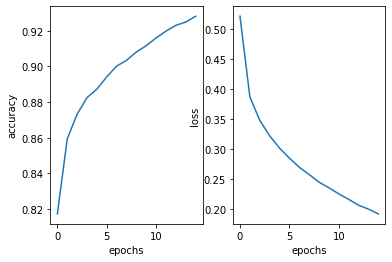

In [11]:
fig, (axs1,axs2) = plt.subplots(1 ,2)
axs1.plot(accuracy)
axs1.set(xlabel='epochs', ylabel='accuracy')

axs2.plot(loss)
axs2.set(xlabel='epochs', ylabel='loss')


# **Predictions**

**on test set**

In [19]:
predictions_test=model.predict(test_images)

Convert probabilities to class numbers




In [20]:
predicted_classes_test=np.array([])

In [21]:
for i in range(10000):
  class_number=np.argmax(predictions_test[i])
  predicted_classes_test=np.append(predicted_classes_test,class_number)

**on training set**

In [30]:
predicted_classes_train=np.array([])

In [31]:
predictions_training=model.predict(train_images)

In [32]:
for i in range(60000):
  class_number=np.argmax(predictions_training[i])
  predicted_classes_train=np.append(predicted_classes_train,class_number)

## **Confusion Matrix, Recall, Precision and F1 score**

Confusion Matrix

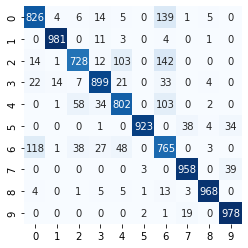

In [15]:
from  sklearn.metrics import confusion_matrix
matrix_confusion = confusion_matrix(test_labels, predicted_classes)
seaborn.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
# 

**Recall Precision and f1 score**

In [25]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

from sklearn.metrics import recall_score


In [26]:
precision = precision_score(test_labels, predicted_classes_test,average="micro")
recall = recall_score(test_labels, predicted_classes_test,average="micro")
F1 = f1_score(test_labels, predicted_classes_test,average="micro")

print("precision",precision)
print("recall",recall)
print("F1",F1)



precision 0.8828
recall 0.8828
F1 0.8827999999999999


**On Training Set**

In [33]:
precision = precision_score(train_labels, predicted_classes_train,average="micro")
recall = recall_score(train_labels, predicted_classes_train,average="micro")
F1 = f1_score(train_labels, predicted_classes_train,average="micro")

print("precision",precision)
print("recall",recall)
print("F1",F1)

precision 0.9285166666666667
recall 0.9285166666666667
F1 0.9285166666666667
